In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, confusion_matrix, accuracy_score
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

from sklearn.linear_model import LinearRegression, Ridge, SGDClassifier
from sklearn.preprocessing import StandardScaler
from scipy.stats import randint
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, KFold

from xgboost import XGBClassifier, XGBRegressor

from yellowbrick.classifier import ClassificationReport

In [23]:
df = pd.read_csv(r'C:\Users\BernadettKepenyes\Documents\GitHub\starbucks-offer-success\success_df.csv')
df.head()

profile_gender  profile_age  profile_income  profile_membership_days  \
0               1         33.0         72000.0                     1448   
1               0         40.0         57000.0                     1185   
2               2         59.0         90000.0                     1861   
3               2         24.0         60000.0                     1609   
4               2         26.0         73000.0                     1387   

   transcript_time  offer_completed  offer_received  offer_viewed  \
0       470.700000                3               5             4   
1       365.000000                3               5             5   
2       335.684211                3               5             3   
3       374.869565                3               4             4   
4       390.600000                3               5             4   

   offer_transaction  transcript_amount  ...  1  2  3  4  5  6  7  8  9  10  
0                  8             127.60  ...  1  0  1  0  0  0  1  1  0   1  
1                  5              79.46  ...  0  1  0  0  0  1  0  1  1   1  
2                  8             196.86  ...  1  0  0  1  1  0  0  1  0   0  
3                 12             154.05  ...  0  1  1  0  0  1  0  1  0   0  
4                 18              48.34  ...  1  0  0  0  0  0  0  1  1   1  

[5 rows x 28 columns]

In [24]:
df.columns

Index(['profile_gender', 'profile_age', 'profile_income',
       'profile_membership_days', 'transcript_time', 'offer_completed',
       'offer_received', 'offer_viewed', 'offer_transaction',
       'transcript_amount', 'transcript_reward', 'meta_reward',
       'meta_required_spending', 'meta_max_hours', 'successful_offer',
       'transaction_amount_rate', 'user_category', '0', '1', '2', '3', '4',
       '5', '6', '7', '8', '9', '10'],
      dtype='object')

In [25]:
df.groupby('user_category').describe()

profile_gender                                               \
                       count      mean       std  min  25%  50%  75%  max   
user_category                                                               
0                     1815.0  1.533333  0.519590  0.0  1.0  2.0  2.0  2.0   
1                     8564.0  1.323797  0.495585  0.0  1.0  1.0  2.0  2.0   
2                     3990.0  1.499499  0.533063  0.0  1.0  2.0  2.0  2.0   
3                      456.0  1.401316  0.537718  0.0  1.0  1.0  2.0  2.0   

              profile_age             ...    9           10            \
                    count       mean  ...  75%  max   count      mean   
user_category                         ...                               
0                  1815.0  57.284298  ...  1.0  1.0  1815.0  0.471074   
1                  8564.0  52.603106  ...  1.0  1.0  8564.0  0.386151   
2                  3990.0  56.792231  ...  1.0  1.0  3990.0  0.314286   
3                   456.0  55.524123  ...  1.0  1.0   456.0  0.236842   

                                                  
                    std  min  25%  50%  75%  max  
user_category                                     
0              0.499300  0.0  0.0  0.0  1.0  1.0  
1              0.486894  0.0  0.0  0.0  1.0  1.0  
2              0.464289  0.0  0.0  0.0  1.0  1.0  
3              0.425612  0.0  0.0  0.0  0.0  1.0  

[4 rows x 216 columns]

In [26]:
# define variable, and target
X = df[['profile_gender', 'profile_age', 'profile_income', 'profile_membership_days', 'transcript_amount', 'meta_reward', 'meta_required_spending', 'meta_max_hours']]
y = df[['user_category']]

X.shape, y.shape

((14825, 8), (14825, 1))

Mean squared error, LinearRegression: 0.3271223940056923
R2 score, LinearRegression: 0.29135540945936433
Mean absolute error, LinearRegression: 0.43066408703530074


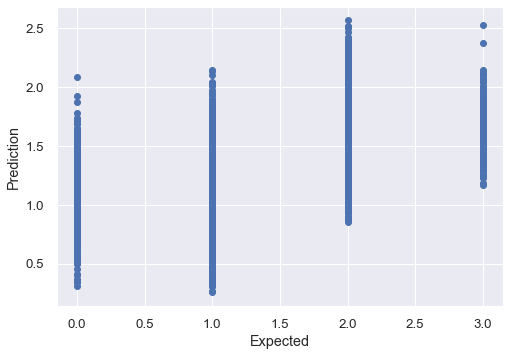

Mean squared error, Ridge: 0.3271223448786417
R2 score, Ridge: 0.2913555158831962
Mean absolute error, Ridge: 0.43066394943737696


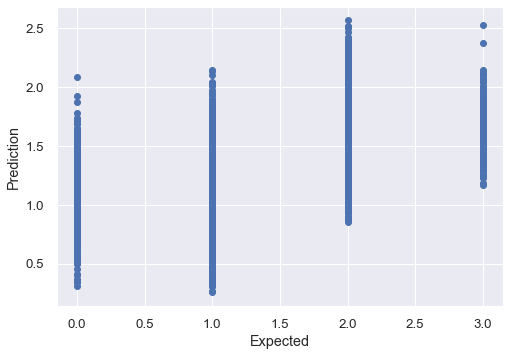

C:\Users\BernadettKepenyes\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
Mean squared error, RandomForestRegressor: 0.2294338442673207
R2 score, RandomForestRegressor: 0.5029779201721352
Mean absolute error, RandomForestRegressor: 0.23977927651747394


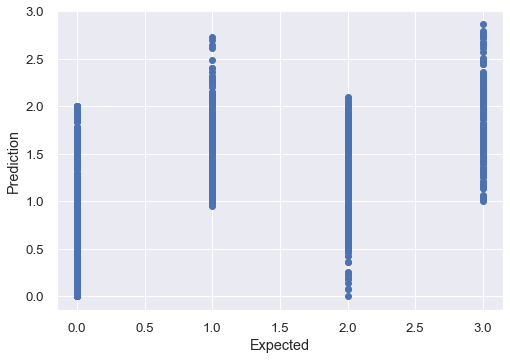

C:\Users\BernadettKepenyes\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
Mean squared error, GradientBoostingClassifier: 0.3337420805231964
R2 score, GradientBoostingClassifier: 0.27701519574222455
Mean absolute error, GradientBoostingClassifier: 0.16697322705906398


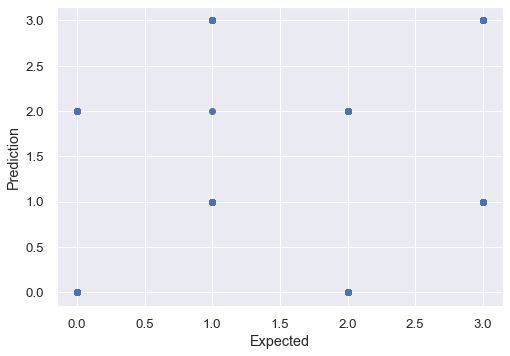

Mean squared error, KNeighborsRegressor: 0.4170202329858983
R2 score, KNeighborsRegressor: 0.0966098999437196
Mean absolute error, KNeighborsRegressor: 0.39223380339260167


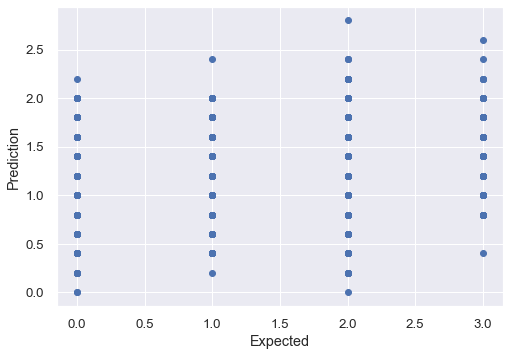

Mean squared error, DecisionTreeRegressor: 0.45840997343143264
R2 score, DecisionTreeRegressor: 0.006947387660630522
Mean absolute error, DecisionTreeRegressor: 0.23237277743715512


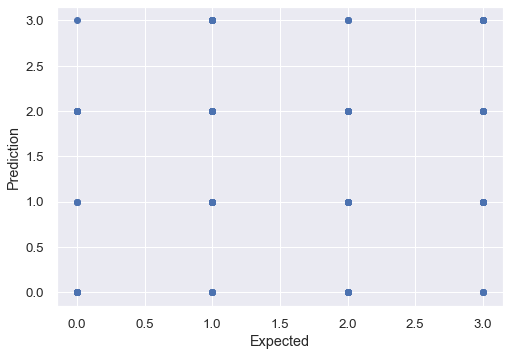

C:\Users\BernadettKepenyes\AppData\Local\Programs\Python\Python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\BernadettKepenyes\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
[22:36:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed f

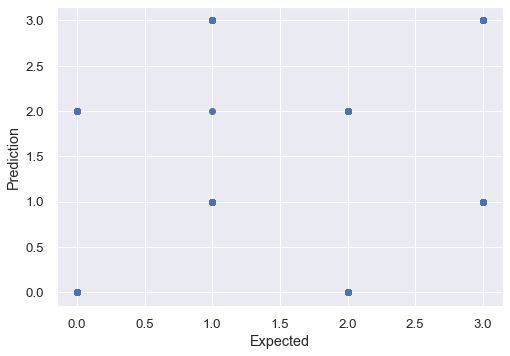

Mean squared error, XGBRegressor: 0.2379911096670968
R2 score, XGBRegressor: 0.4844403331817858
Mean absolute error, XGBRegressor: 0.2634505082455999


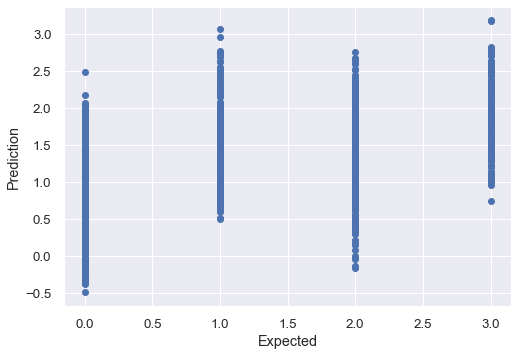

In [28]:
models = [
    LinearRegression(),
    Ridge(),
    RandomForestRegressor(),
    GradientBoostingClassifier(),
    KNeighborsRegressor(),
    DecisionTreeRegressor(),
    XGBClassifier(),
    XGBRegressor()
]

def score_model(X, y, estimator):
    '''
    Test various estimators.
    Input: Imported data
    Output: F1 score
    '''

    # create a pipeline object
    model = Pipeline([
        ('estimator', estimator)
    ])

    # split model into train and test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

    # Instantiate the classification model and visualizer
    model.fit(X_train, y_train)

    expected  = y_test
    predicted = model.predict(X_test)
    
    print("Mean squared error, {}: {}".format(estimator.__class__.__name__,mean_squared_error(expected, predicted)))
    print("R2 score, {}: {}".format(estimator.__class__.__name__, r2_score(expected, predicted)))
    print("Mean absolute error, {}: {}".format(estimator.__class__.__name__,mean_absolute_error(expected, predicted)))

    plt.figure()
    plt.scatter(expected, predicted)
    plt.xlabel("Expected")
    plt.ylabel("Prediction")
    plt.show()



for model in models:
    score_model(X, y, model)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# define the parameter space that will be searched over
model_params = {
    # randomly sample numbers from 4 to 204 estimators
    'n_estimators': randint(4,200),
    # normally distributed max_features, with mean .25 stddev 0.1, bounded between 0 and 1
    #'max_features': truncnorm(a=0, b=1, loc=0.25, scale=0.1),
    # uniform distribution from 0.01 to 0.2 (0.01 + 0.199)
    #'min_samples_split': uniform(0.01, 0.199)
}

# create a model
rf_model = RandomForestClassifier()

# create a searchCV object and fit it to the data
clf = RandomizedSearchCV(rf_model, model_params, n_iter=100, cv=5, random_state=1)

# train the random-search estimator to find the best model out of 100
model = clf.fit(X_train, y_train)
                                        
# print winning set of hyperparameters
model.best_estimator_.get_params()

 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\BernadettKepenyes\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\BernadettKepenyes\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\BernadettKepenyes\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d arr

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 157,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

Accuracy score, 0.9212301052063663


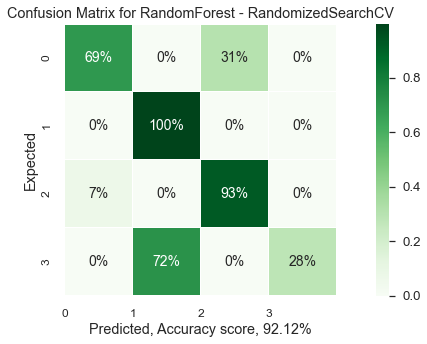

In [39]:
# generate predictions using the best performing model
expectations = y_test
predictions = model.predict(X_test)

print("Accuracy score, {}".format(accuracy_score(expectations,predictions)))

# reshape confustion matrix data
matrix = confusion_matrix(expectations, predictions)
matrix = matrix.astype('float') / matrix.sum(axis=1) [:, np.newaxis]

# build plot
plt.figure(figsize=(14,5))
sns.set(font_scale=1.2)
ax = sns.heatmap(matrix, annot=True, annot_kws={'size':14}, cmap=plt.cm.Greens, linewidths=0.1, fmt = '.0%', square=1)
classes = ['0','1','2','3']

# add labels to the plot
class_names = classes
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, fontsize=12)
plt.yticks(tick_marks2, class_names, fontsize=12)
plt.xlabel("Predicted, Accuracy score, {:.2%}".format(accuracy_score(expectations,predictions)))
plt.ylabel('Expected')
plt.title('Confusion Matrix for RandomForest - RandomizedSearchCV')
plt.show()


C:\Users\BernadettKepenyes\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\BernadettKepenyes\AppData\Local\Programs\Python\Python38\lib\site-packages\yellowbrick\classifier\base.py:251: YellowbrickWarning: both classes and encoder specified, using encoder
  warnings.warn(
C:\Users\BernadettKepenyes\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


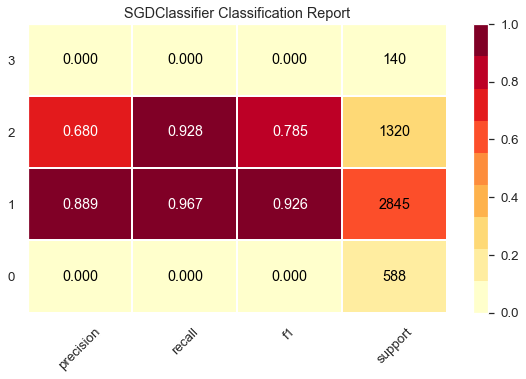

C:\Users\BernadettKepenyes\AppData\Local\Programs\Python\Python38\lib\site-packages\yellowbrick\classifier\base.py:251: YellowbrickWarning: both classes and encoder specified, using encoder
  warnings.warn(


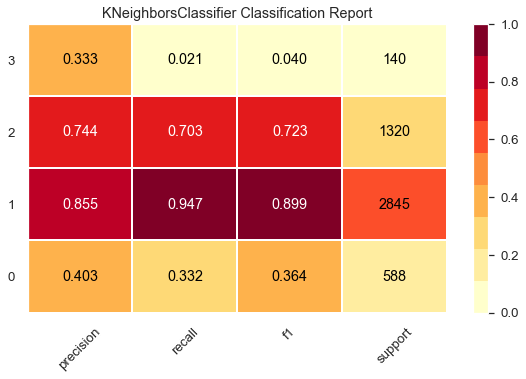

C:\Users\BernadettKepenyes\AppData\Local\Programs\Python\Python38\lib\site-packages\yellowbrick\classifier\base.py:251: YellowbrickWarning: both classes and encoder specified, using encoder
  warnings.warn(


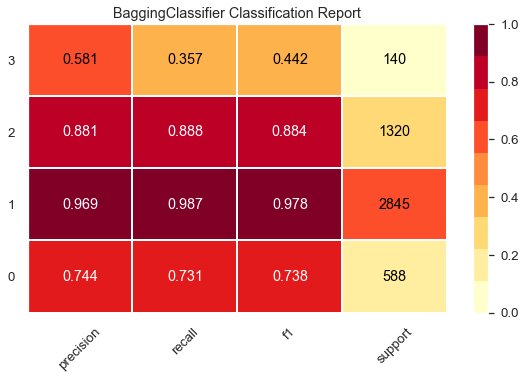

C:\Users\BernadettKepenyes\AppData\Local\Programs\Python\Python38\lib\site-packages\yellowbrick\classifier\base.py:251: YellowbrickWarning: both classes and encoder specified, using encoder
  warnings.warn(


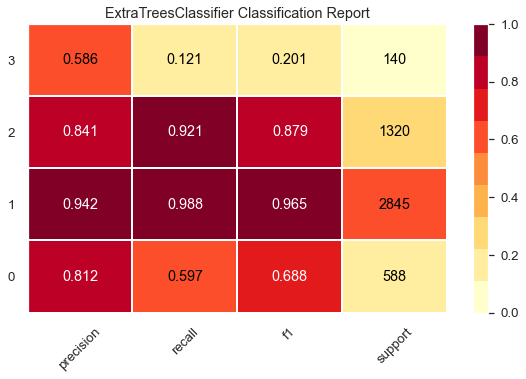

C:\Users\BernadettKepenyes\AppData\Local\Programs\Python\Python38\lib\site-packages\yellowbrick\classifier\base.py:251: YellowbrickWarning: both classes and encoder specified, using encoder
  warnings.warn(


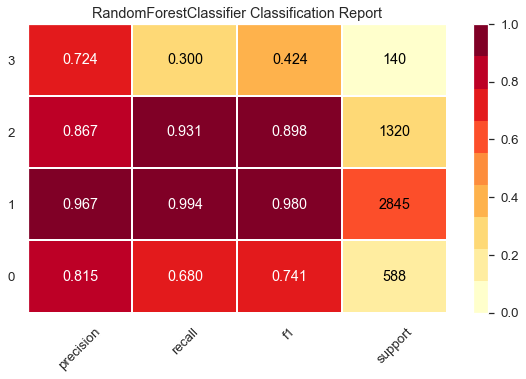

C:\Users\BernadettKepenyes\AppData\Local\Programs\Python\Python38\lib\site-packages\yellowbrick\classifier\base.py:251: YellowbrickWarning: both classes and encoder specified, using encoder
  warnings.warn(


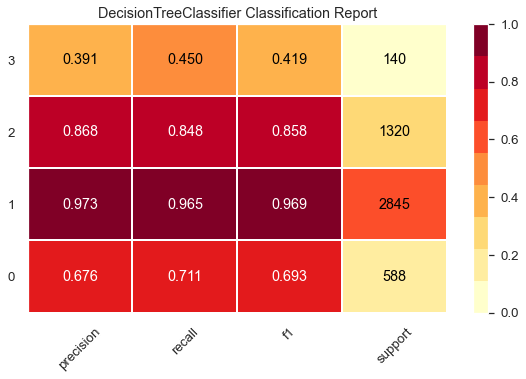

In [30]:
classification_models = [ 
    SGDClassifier(max_iter=100, tol=1e-3), 
    KNeighborsClassifier(),
    BaggingClassifier(), 
    ExtraTreesClassifier(n_estimators=300),
    RandomForestClassifier(n_estimators=300),
    DecisionTreeClassifier()
]

def score_classification_model(X, y, model):
    '''
    Test various estimators.
    Input: Imported data
    Output: F1 score
    '''
    # specify the target classes
    encoder = LabelEncoder()
    y = encoder.fit_transform(df['user_category'])


    # split model into train and test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

    # Instantiate the classification model and visualizer
    visualizer = ClassificationReport(model, classes=encoder.classes_, encoder=encoder, support=True)

    visualizer.fit(X_train, y_train) # Fit the visualizer and the model
    visualizer.score(X_test, y_test) # Evaluate the model on the test data
    visualizer.show() # Finalize and show the figure


for model in classification_models:
    score_classification_model(X, y, model)

C:\Users\BernadettKepenyes\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
Accuracy score, 0.6200694870222767


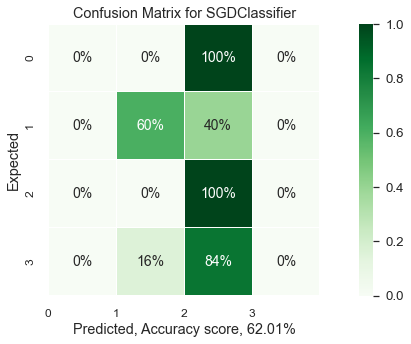

Accuracy score, 0.7809115062333947


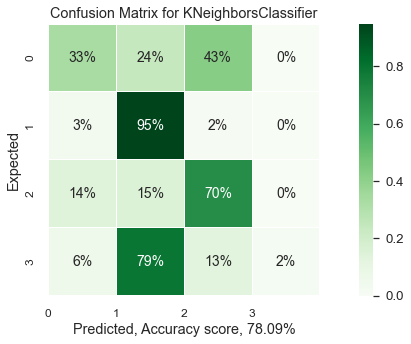

Accuracy score, 0.9149805845084815


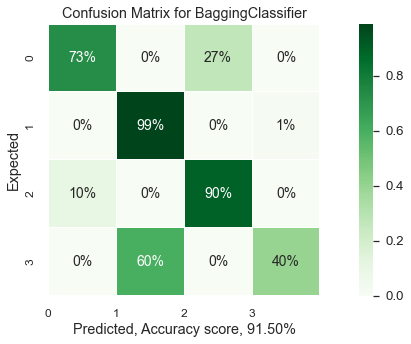

Accuracy score, 0.9014919272430002


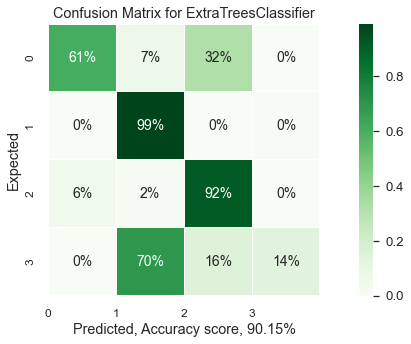

Accuracy score, 0.9192724300020437


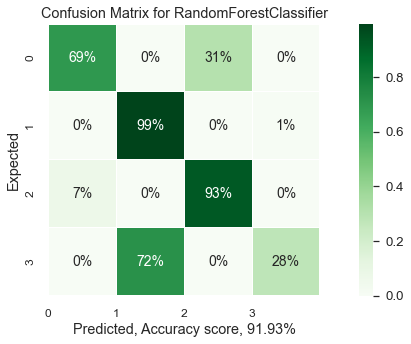

Accuracy score, 0.888820764357245


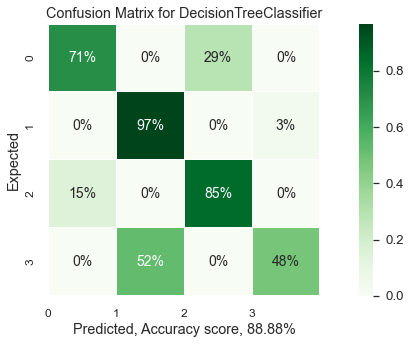

In [41]:
def get_confusion_matrix(X, y, estimator):
    '''
    Test various estimators.
    Input: Imported data
    Output: F1 score
    '''
    
    model = Pipeline([
        ('estimator', estimator)
    ])

    encoder = LabelEncoder()
    y = encoder.fit_transform(df['user_category'])

    # split model into train and test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

    # Instantiate the classification model and visualizer
    model.fit(X_train, y_train)

    expected  = y_test
    predicted = model.predict(X_test)
    
    print("Accuracy score, {}".format(accuracy_score(expected,predicted)))

    # reshape confustion matrix data
    matrix = confusion_matrix(expected, predicted)
    matrix = matrix.astype('float') / matrix.sum(axis=1) [:, np.newaxis]

    # build plot
    plt.figure(figsize=(14,5))
    sns.set(font_scale=1.2)
    ax = sns.heatmap(matrix, annot=True, annot_kws={'size':14}, cmap=plt.cm.Greens, linewidths=0.1, fmt = '.0%', square=1)

    # add labels to the plot
    class_names = encoder.classes_
    tick_marks = np.arange(len(class_names))
    tick_marks2 = tick_marks + 0.5
    plt.xticks(tick_marks, class_names, fontsize=12)
    plt.yticks(tick_marks2, class_names, fontsize=12)
    plt.xlabel("Predicted, Accuracy score, {:.2%}".format(accuracy_score(expected,predicted)))
    plt.ylabel('Expected')
    plt.title('Confusion Matrix for {}'.format(estimator.__class__.__name__))
    plt.show()


for model in classification_models:
    get_confusion_matrix(X, y, model)

In [10]:
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 300,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

Accuracy score, 0.5947271612507664


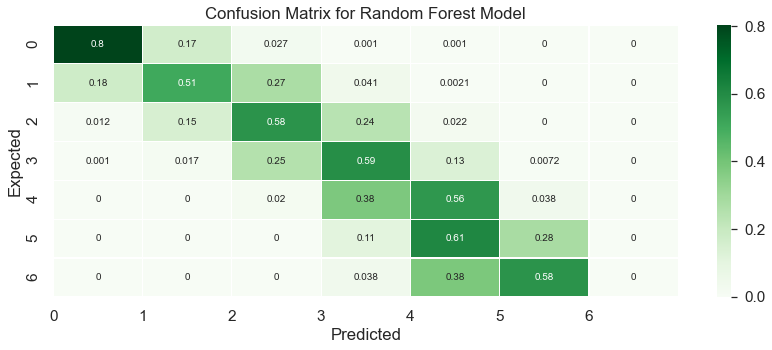

In [11]:
def finetune_randomforest_model():
    '''
    Test various estimators.
    Input: Imported data
    Output: F1 score
    '''
    
    encoder = LabelEncoder()
    y = encoder.fit_transform(df['successful_offer'])

    # split model into train and test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

    n_estimators = [100, 300, 500, 800, 1200]
    max_depth = [5, 8, 15, 25, 30]
    min_samples_split = [2, 5, 10, 15, 100]
    min_samples_leaf = [1, 2, 5, 10]

    # define parameters
    params = {"max_depth": max_depth, "n_estimators":n_estimators, "min_samples_split": min_samples_split, "min_samples_leaf": min_samples_leaf}

    model = RandomForestClassifier()

    grid = GridSearchCV(estimator=model, param_grid=params, scoring='accuracy')
    grid.fit(X_train, y_train)
    
    expected  = y_test
    predicted = grid.predict(X_test)

    print("Accuracy score, {}".format(accuracy_score(expected,predicted)))


    # reshape confusion matrix data
    matrix = confusion_matrix(expected,predicted)
    matrix = matrix.astype('float') / matrix.sum(axis=1) [:, np.newaxis]

    # build plot
    plt.figure(figsize=(14,5))
    sns.set(font_scale=1.4)
    sns.heatmap(matrix, annot=True, annot_kws={'size':10}, cmap=plt.cm.Greens, linewidths=0.2)

    # add labels to the plot
    class_names = encoder.classes_
    tick_marks = np.arange(len(class_names))
    tick_marks2 = tick_marks + 0.5
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks2, class_names)
    plt.xlabel('Predicted')
    plt.ylabel('Expected')
    plt.title('Confusion Matrix for Random Forest Model')
    plt.show()


finetune_randomforest_model()